In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

In [3]:
df = pd.read_csv("Netflix Dataset.csv")
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
print("Shape of Dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

Shape of Dataset: (7789, 11)

Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [7]:
# Convert Release_Date to datetime

df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year

In [8]:
# Handle missing values
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
df['Country'] = df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated")

In [9]:
df['Main_Genre'] = df['Type'].apply(lambda x: x.split(",")[0].strip() if pd.notnull(x) else "Unknown")

In [10]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Main_Genre
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,International TV Shows
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,Action & Adventure
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,Dramas



Category Distribution:
 Category
Movie      5379
TV Show    2410
Name: count, dtype: int64


C:\Users\Mohammed Mudasir\AppData\Local\Temp\ipykernel_57920\3477002764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='Set2')


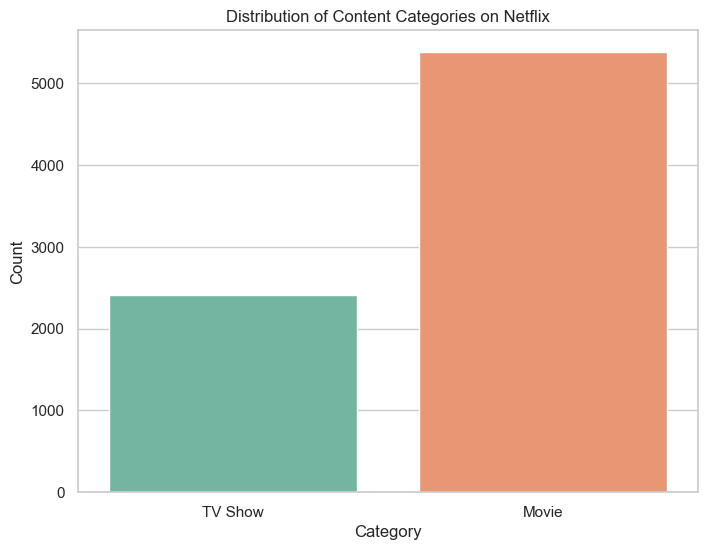

In [11]:
print("\nCategory Distribution:\n", df['Category'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Category', palette='Set2')
plt.title('Distribution of Content Categories on Netflix')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


Top 5 Countries:
 Country
United States     2556
India              923
Unknown            507
United Kingdom     397
Japan              226
Name: count, dtype: int64


C:\Users\Mohammed Mudasir\AppData\Local\Temp\ipykernel_57920\15949320.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Country'].isin(top_countries)], y='Country', order=top_countries, palette='Set3')


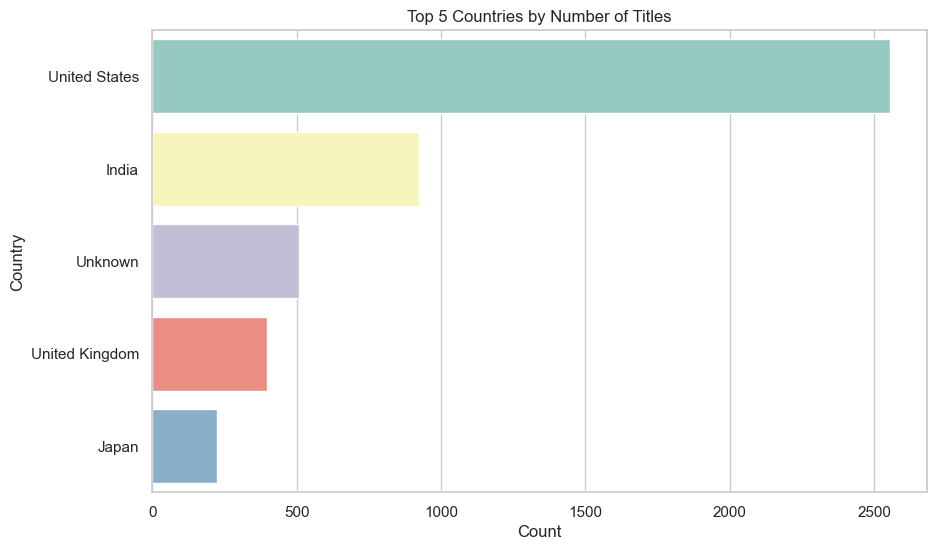

In [12]:
print("\nTop 5 Countries:\n", df['Country'].value_counts().head(5))
plt.figure(figsize=(10,6))
top_countries = df['Country'].value_counts().nlargest(5).index
sns.countplot(data=df[df['Country'].isin(top_countries)], y='Country', order=top_countries, palette='Set3')
plt.title('Top 5 Countries by Number of Titles')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [13]:
print("\nDataset covers years from", df['Year'].min(), "to", df['Year'].max())


Dataset covers years from 2008.0 to 2021.0


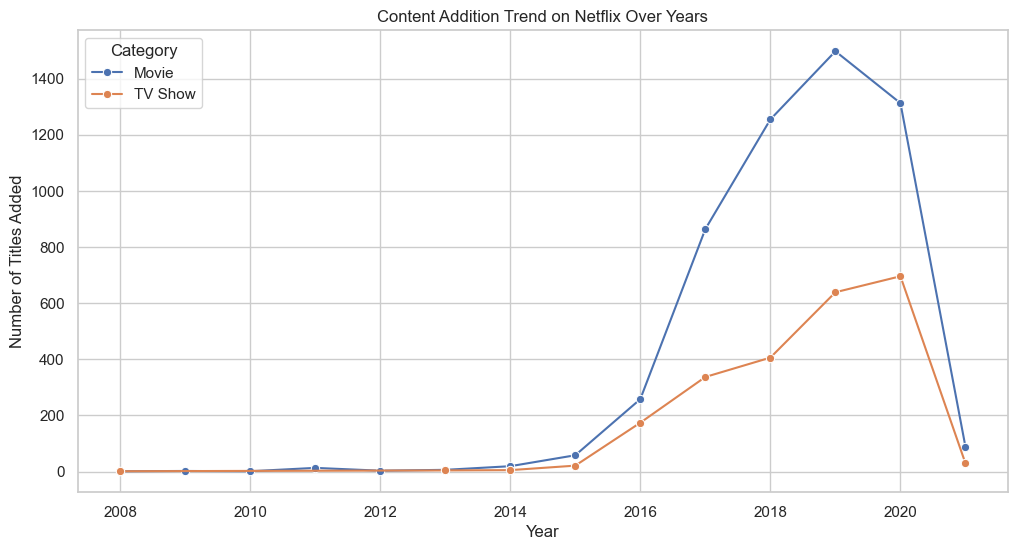

In [14]:
content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')
sns.lineplot(data=content_trend, x='Year', y='Count', hue='Category', marker='o')
plt.title('Content Addition Trend on Netflix Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()

C:\Users\Mohammed Mudasir\AppData\Local\Temp\ipykernel_57920\904772235.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='Set1')


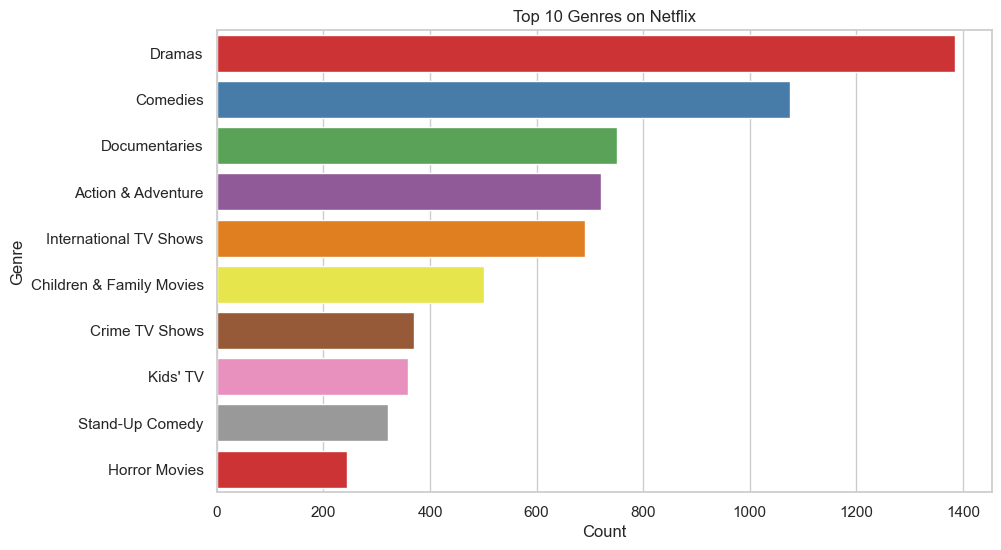

In [15]:
top_genres = df['Main_Genre'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='Set1')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

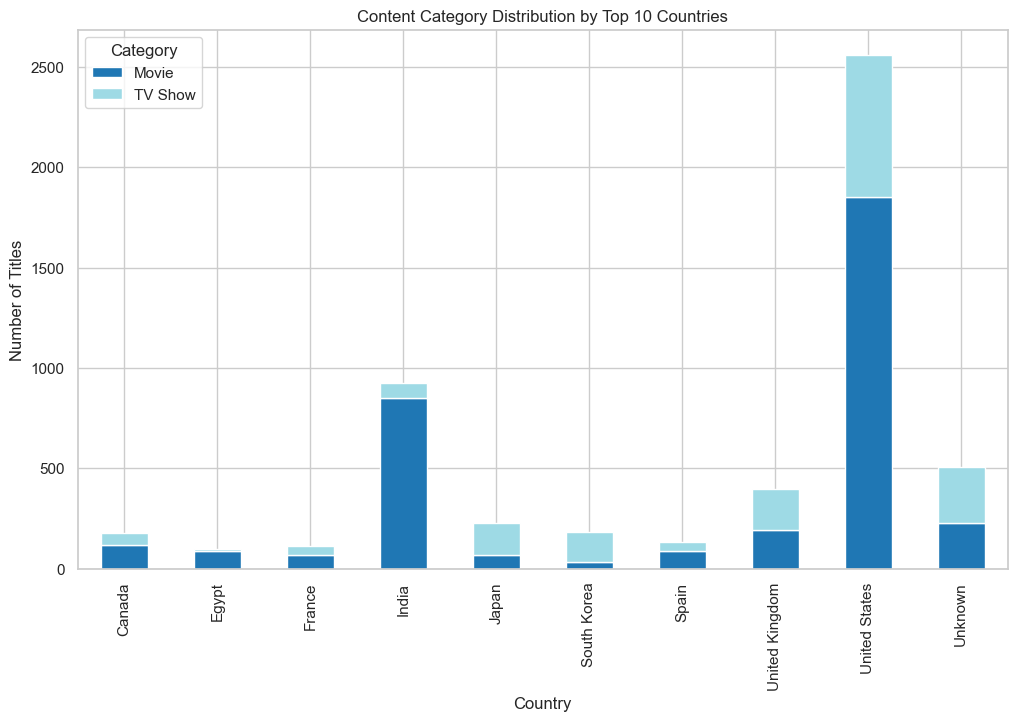

In [16]:
top_countries = df['Country'].value_counts().head(10).index
country_data = df[df['Country'].isin(top_countries)]
stacked = country_data.groupby(['Country', 'Category']).size().unstack(fill_value=0)
stacked.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12,7))
plt.title('Content Category Distribution by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.legend(title='Category')
plt.show()

In [22]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
fig = px.choropleth(country_counts, locations='Country', locationmode='country names',
                    color='Count', color_continuous_scale='Viridis',
                    title='Netflix Content Distribution by Country')
fig.show()

C:\Users\Mohammed Mudasir\AppData\Local\Temp\ipykernel_57920\2632086982.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



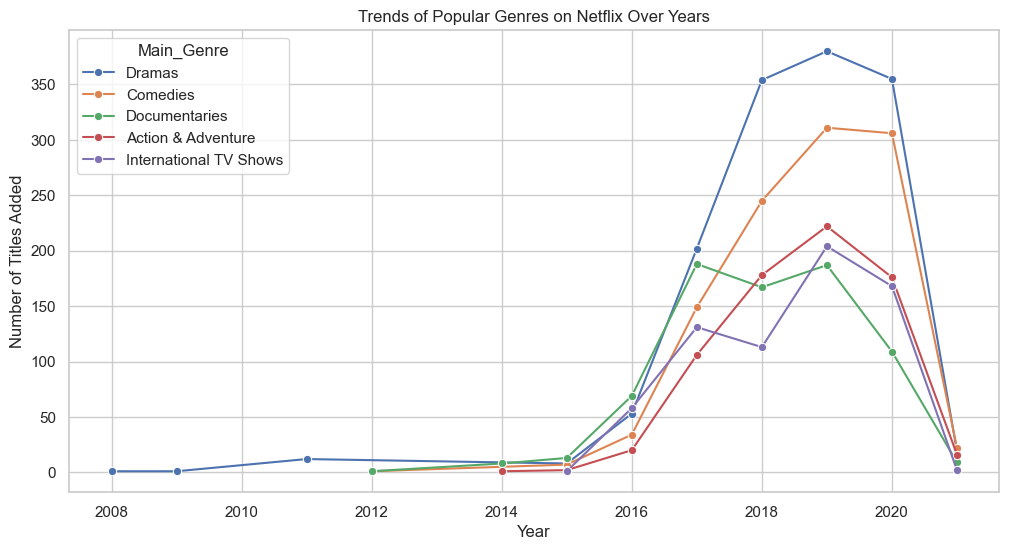

In [18]:
popular_genres = df['Main_Genre'].value_counts().head(5).index
genre_trends = df[df['Main_Genre'].isin(popular_genres)].groupby(['Year','Main_Genre']).size().reset_index(name='Count')
sns.lineplot(data=genre_trends, x='Year', y='Count', hue='Main_Genre', marker='o')
plt.title('Trends of Popular Genres on Netflix Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()

C:\Users\Mohammed Mudasir\AppData\Local\Temp\ipykernel_57920\793918000.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




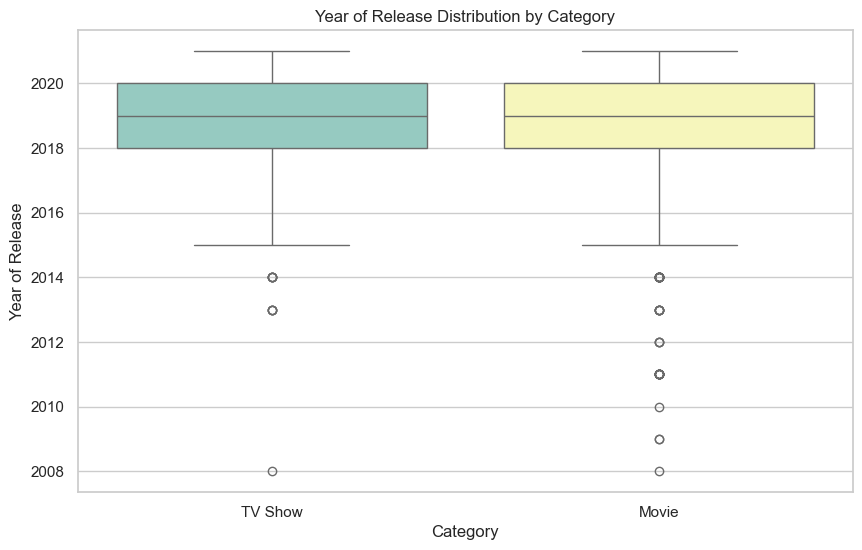

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Category', y='Year', palette='Set3')
plt.title('Year of Release Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Year of Release')
plt.show()